In [96]:
import numpy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
G = 0.1
dt = 0.01

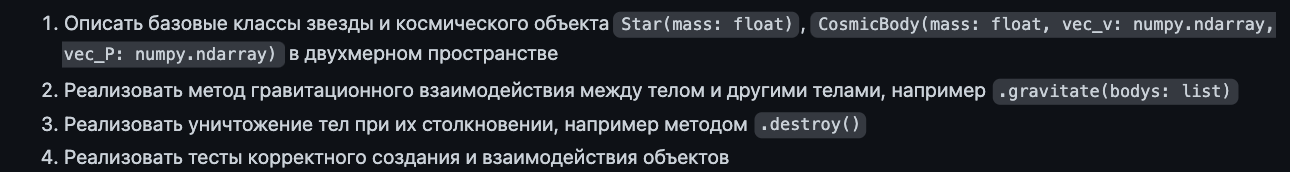

In [117]:
class Item:
    def __init__(self, m: float, r0: np.ndarray, v0: np.ndarray, name):
        self.name = name
        self.m = m
        self.v = v0
        self.r = r0
        self.type = None
        self.history = np.array(self.r, dtype=np.float)

    def __str__(self):
        if type is not None:
            return f'mass:{np.round(self.m, 2)}, Coordinates:{np.round(self.r, 2)}, type:{self.type}'
        else:
            return f'mass:{np.round(self.m, 2)}, Coordinates:{np.round(self.r, 2)}'

    def kin(self):
        return self.m * np.linalg.norm(self.v) ** 2 / 2


def full_energy(items):
    energy = 0.
    for i in items:
        energy += i.kin()

    for j in range(len(items)):
        flg = j+1
        while flg < len(items):
            energy += - G * items[j].m * items[flg].m / np.linalg.norm(items[j].r - items[flg].r)
            flg+=1
            
    return np.fabs(energy)

In [129]:
def step(items):
    for i in range(len(items)):
        for j in range(len(items)):
            if j != i:
                dv = -dt * G * items[j].m * (items[i].r - items[j].r) / np.linalg.norm(items[i].r - items[j].r) ** 3
                items[i].v += dv

    for i in items:
        i.r += i.v * dt
        i.history = np.vstack((i.history, i.r))
    
    #destroy
    for j in range(len(items)):
        k = j+1
        while k < len(items):
            if items[j].r == items[k].r:
                items.remove(items[j])
                items.remove(items[k])
            k+=1
        

In [100]:
def test_зсэ(items, k, stop):
    o = full_energy(items)
    cnt = 0
    t = 0
    print(np.fabs(full_energy(items) - o))
    while (np.fabs(full_energy(items) - o) < o * k) and (cnt < stop):
        cnt += 1
        step(items)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection='3d')
    for x in items:
        ax.scatter(x.history[:, 0], x.history[:, 1], x.history[:, 2])
    print(cnt)

<h5 align = 'center'>--------------------------------------------5--------------------------------------------</h5>


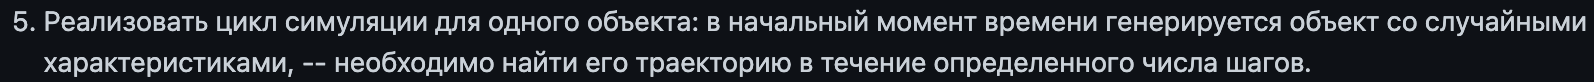

0.0
1000


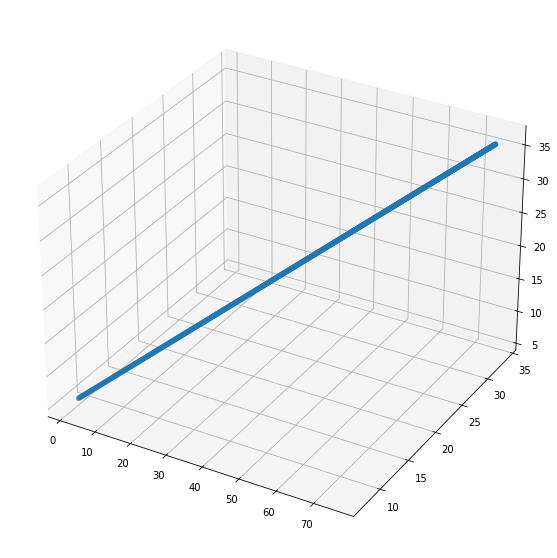

In [118]:
b0 = Item(10, np.random.rand(3)*10, np.random.rand(3)*10, 'b0')
it = [b0]
test_зсэ(it, 0.01, 1000)
# test_зсэ(объекты, критическое отклонение от начальной суммарной энергии в процентах,
#         количество итераций)

<h5 align = 'center'>--------------------------------------------4_6--------------------------------------------</h5>


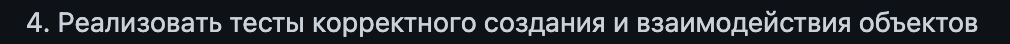


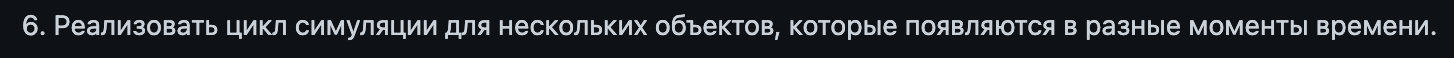

Проверка ЗСЭ, все объкты появляются в самом начале при t=0, тк иначе, если они будут появляться в разные моменты времени, то не будет выполнятся закон сохранения энергии:

0.0
1000


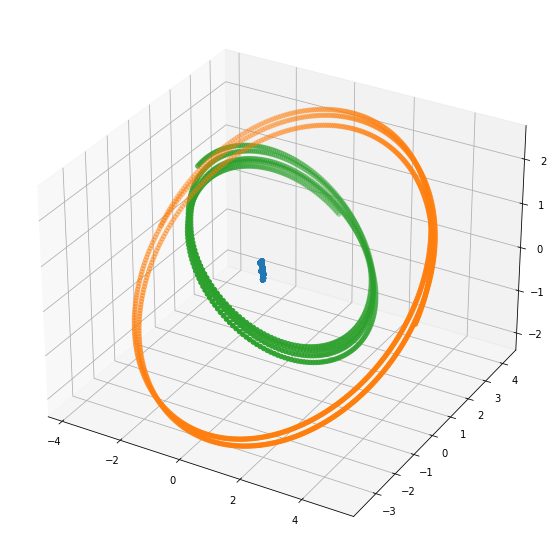

In [119]:
b1 = Item(2000, np.random.rand(3) * 0, np.random.rand(3) * 0, 'b1')
b2 = Item(10, np.array([5., 0., 0]), np.array([0., 5., 3.]), 'b2')
b3 = Item(10, np.array([0., 4., 0]), np.array([-5., 0., 3.]), 'b3')
it = [b1, b2, b3]
test_зсэ(it, 0.01, 1000)

При проверке ЗСЭ выясняется, что ошибка хотя бы в один процент за 1000 итераций не набегает. Значит можно сделать вывод о том, что закон сохранения энергии выполняется.

<h5 align = 'center'>--------------------------------------------7--------------------------------------------</h5>


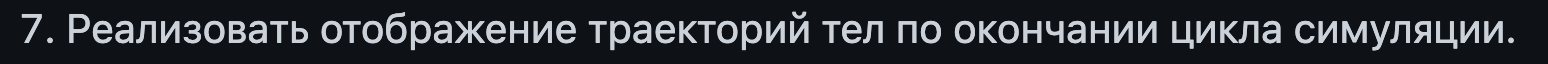

0.0
300


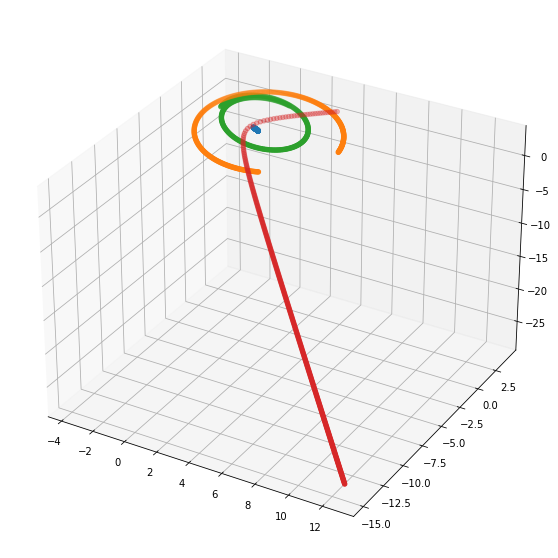

In [120]:
b1 = Item(2000, np.random.rand(3) * 0, np.random.rand(3) * 0, 'b1')
b2 = Item(11, np.array([5., 0., 0]), np.array([0., 5., 3.]), 'b2')
b3 = Item(12, np.array([0., 4., 0]), np.array([-5., 0., 3.]), 'b3')
b4 = Item(13, np.array([3., 4., 1]), np.array([-10., -10., 0.]), 'b4')
it = [b1, b2, b3, b4]
test_зсэ(it, 6, 300)

<h5 align = 'center'>--------------------------------------------8--------------------------------------------</h5>


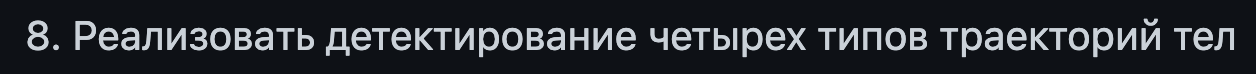

четырех????

In [121]:
def each_energy(items : list) -> list:
    total = []
    for i in range(len(items)):
        en = items[i].kin()
        for j in range(len(items)):
            if i != j:
                en += -G * items[i].m * items[j].m /np.linalg.norm(items[i].r - items[j].r)
        if en > 0:
            items[i].type = "hyperbole"
        elif en == 0:
            items[i].type = "parabola"
        else:
            items[i].type = "ellipse"
        total.append(en)
    
    for i in items:
        print(f'name:{i.name}, type:{i.type}')

In [122]:
each_energy(it)

name:b1, type:ellipse
name:b2, type:ellipse
name:b3, type:ellipse
name:b4, type:hyperbole


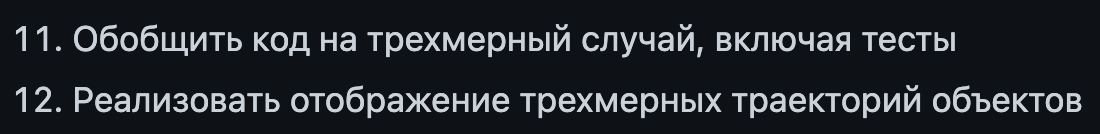

тесты позже все допилю